In [20]:
!gdown '1RR2W4Sxid0T18pThz72uzKxkF17EUdRm'

Downloading...
From: https://drive.google.com/uc?id=1RR2W4Sxid0T18pThz72uzKxkF17EUdRm
To: /content/trips.csv
100% 140M/140M [00:00<00:00, 192MB/s]


In [21]:
import sys
import csv
from datetime import datetime

In [22]:
#Question 1 containers

#1a Containers
weekday={'Primary':0,'Broker':0,'E-Hail':0,'Total':0}
weekend={'Primary':0,'Broker':0,'E-Hail':0,'Total':0}
total={}
Table1=[weekday,weekend,total]
    
#1b Containers   
weekdayAve={'Primary':0,'Broker':0,'E-Hail':0,'Total':0}
weekendAve={'Primary':0,'Broker':0,'E-Hail':0,'Total':0}
totalAve={}
Table2=[weekdayAve,weekendAve,totalAve]
#1c Containers    
weekday3={'Primary':0,'Broker':0,'E-Hail':0,'Total':0}
weekend3={'Primary':0,'Broker':0,'E-Hail':0,'Total':0}
total3={}
Table3=[weekday3,weekend3,total3]

In [23]:
#Question 2 container
histData={}


#question3 container
zipcodes={}

In [24]:
#getting the data from the file and filling the containers
with open('trips.csv', 'r') as fi:
    reader = csv.DictReader(fi)  
    for row in reader:
        provider= row['ProviderType']
        status=row['Outcome']
        date=row['Tripdate']
        day=datetime.strptime(date, '%Y-%m-%d').strftime('%w')#day is a number
        # from 1-7 to represent the days of the week-->type string
        time=row['ADtime']
        
        #task1 container filling
        if (provider in weekday.keys()):
            if int(day)<6:
                weekdayAve[provider]+=1
                if status=='Authorized' or  status=='Completed':#number of succesful trips
                    weekday[provider]+=1
            else:
                weekendAve[provider]+=1
                if status=='Authorized' or  status=='Completed':#number of succesful trips
                    weekend[provider]+=1
        #task2 container filling
        if status=='Authorized' or  status=='Completed':
          time=row['ADtime']
          x=int(time.split(':')[0])
          if x>-1: #the file had some negative times
            if x>23: #file had some hours >23
              histData[x-24]=histData.get(x-24,0)+1
            else:
              histData[x]=histData.get(x,0)+1
        
        #task 3 container filling
        if provider=="Primary" and (status=='Authorized' or  status=='Completed'):
          hour1=datetime.strptime('6:00', "%H:%M").time()#turn 6:00 into a datetime object
          hour2=datetime.strptime('10:00', "%H:%M").time()#turn 10:00 into a datetime object
          x=int(time.split(':')[0]) #this is to include the time that is >23
          if x>-1:
            if x>23:
              x=x-24
              time=':'.join([str(x),time.split(':')[1]])#turn the result into a datetime object
          time1=datetime.strptime(time, "%H:%M").time()
          if(time1>=hour1 and time1<=hour2):
            zip=row['PickZip']
            zipcodes[zip]=zipcodes.get(zip,0)+1


        
   

In [25]:
#task 1
#task 1a
for key in weekday:
    total[key]=weekday[key]+weekend[key]
    totalAve[key]=weekdayAve[key]+weekendAve[key] #part of task 1b
    if key !='Total':
      weekday['Total']+=weekday[key]
      weekend['Total']+=weekend[key]
      weekdayAve['Total']+=weekdayAve[key] #part of task 1b
      weekendAve['Total']+=weekendAve[key] #part of task 1b
            
        
# task 1c        
for key in weekdayAve:
    weekday3[key]="{:.2%}".format(weekdayAve[key]/weekdayAve['Total'])
    weekend3[key]="{:.2%}".format(weekendAve[key]/weekendAve['Total'])
    total3[key]="{:.2%}".format(totalAve[key]/totalAve['Total'])
     #part of task 1b   
    weekdayAve[key]=round(weekday[key]/5)
    weekendAve[key]=round(weekend[key]/2)
    totalAve[key]=round(total[key]/7)
print("Table1")
for i in Table1:       
  print(i)
print("Table1")
for i in Table2:       
  print(i)
print("Table1")
for i in Table3:       
  print(i)


Table1
{'Primary': 124626, 'Broker': 256084, 'E-Hail': 93699, 'Total': 474409}
{'Primary': 15033, 'Broker': 32533, 'E-Hail': 10141, 'Total': 57707}
{'Primary': 139659, 'Broker': 288617, 'E-Hail': 103840, 'Total': 532116}
Table1
{'Primary': 24925, 'Broker': 51217, 'E-Hail': 18740, 'Total': 94882}
{'Primary': 7516, 'Broker': 16266, 'E-Hail': 5070, 'Total': 28854}
{'Primary': 19951, 'Broker': 41231, 'E-Hail': 14834, 'Total': 76017}
Table1
{'Primary': '14.02%', 'Broker': '26.87%', 'E-Hail': '59.10%', 'Total': '100.00%'}
{'Primary': '14.07%', 'Broker': '27.89%', 'E-Hail': '58.05%', 'Total': '100.00%'}
{'Primary': '14.03%', 'Broker': '26.98%', 'E-Hail': '58.99%', 'Total': '100.00%'}


[(0, 67524), (1, 1064), (2, 573), (3, 531), (4, 2942), (5, 6747), (6, 13347), (7, 23519), (8, 33632), (9, 43132), (10, 44423), (11, 42017), (12, 42252), (13, 40581), (14, 37096), (15, 32157), (16, 28223), (17, 25650), (18, 22308), (19, 15562), (20, 9910), (21, 8234), (22, 6104), (23, 4251)]


<ipython-input-26-a9b03e0bbc38>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats('svg')
<ipython-input-26-a9b03e0bbc38>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=list(histData.keys()), y=list(histData.values()), color="b", ci=None)


Text(0, 0.5, 'Number of Trips')

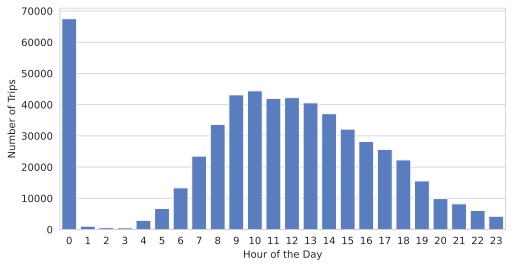

In [26]:
#task 2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
IPython.display.set_matplotlib_formats('svg')
sns.set_style("whitegrid")
sns.set_color_codes("muted")
print(sorted(histData.items(), key=lambda x: x[0]))

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=list(histData.keys()), y=list(histData.values()), color="b", ci=None)
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Trips')




In [27]:
#task 3
for i in range(10):
  print(sorted(zipcodes.items(), key=lambda x: x[1], reverse=True)[i])



('10314', 1091)
('10304', 757)
('11207', 720)
('11212', 713)
('10306', 675)
('10301', 630)
('11434', 594)
('11233', 524)
('11691', 508)
('11236', 494)
